Statistika Logistik

Nama Kelompok

Febriani Yolanda Tessalonika 24093010037

Yohanes Olvin Jun Sole 24083010029

Varid Putra Pratama 24083010007

# Import Library

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np



# Upload Data

In [ ]:
import pandas as pd


from google.colab import files
uploaded = files.upload()

Saving DATA STATREG LOGISTIK.csv to DATA STATREG LOGISTIK (4).csv


# Membaca Data

In [ ]:
data = "DATA STATREG LOGISTIK.csv"
df = pd.read_csv(data, sep=',', encoding='latin-1')

#  DataTable
%load_ext google.colab.data_table

# Tampilkan data dalam bentuk tabel
df.head(38)   # atau df untuk semua data

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Y: Presentase Penduduk Miskin,X1: Angka Melek Huruf,X2: Tingkat Pengangguran Terbuka,X3: Laju Pertumbuhan Ekonomi,X4: Rata-rata lama Sekolah,X5: Angka Partisipasi Sekolah
0,13.50,94,1.56,4.34,8.0,10.75
1,9.11,90,4.19,4.74,8.0,20.80
2,10.50,95,3.90,4.71,8.0,13.52
3,6.28,96,4.12,4.86,9.0,22.07
4,8.16,94,4.77,4.44,8.0,14.92
5,9.95,94,5.10,4.95,8.0,18.16
6,8.98,95,5.13,4.96,8.0,28.29
7,8.65,93,3.28,4.52,7.0,16.35
8,9.01,90,3.23,4.86,7.0,26.11
9,6.54,94,4.03,4.68,8.0,16.52


output yang dihasilkan menampilkan 38 dataset observasi dan 6 variabel. Baris mewakili setiap wilayah kota/kabuopaten administratif, kolom berisi variabel sosial-ekonomi dan pendidikan.

- Y : presentase penduduk miskin (variabel dependen), dengan kisaran 4–20%, yang mengidentifikasi terdapat variabel tingkat kemiskinan antar wilayah.

- X1 : Angka Melek Huruf (variabel independen) , rentang nilai 85–98%, akan berkaitan dengan kemampuan memperoleh pekerjaan dan pendapatan.

- X2 : Tingkat Pengangguran Terbuka (variabel independen) dengan rentang nilai 1,5-7%, akan berkaitan dengan konteks ekonomi.

- X3 : Laju Pertumbuhan Ekonomi (variabel independen) rentang 3–6,5%. ini berdampak pada meningkatnya peluang kerja, peningkatan investasi.

- X4 : X4: Rata-rata Lama Sekolah (variabel independen) Nilai pada dataset berada di kisaran 6–11 tahun. Ini berpengaruh langsung terhadap keterampilan, peluang kerja, dan pendapatan.

- X5 : Angka Partisipasi Sekolah (variabel independen) rentang nilai 10-38%.

# Visualisasi Data

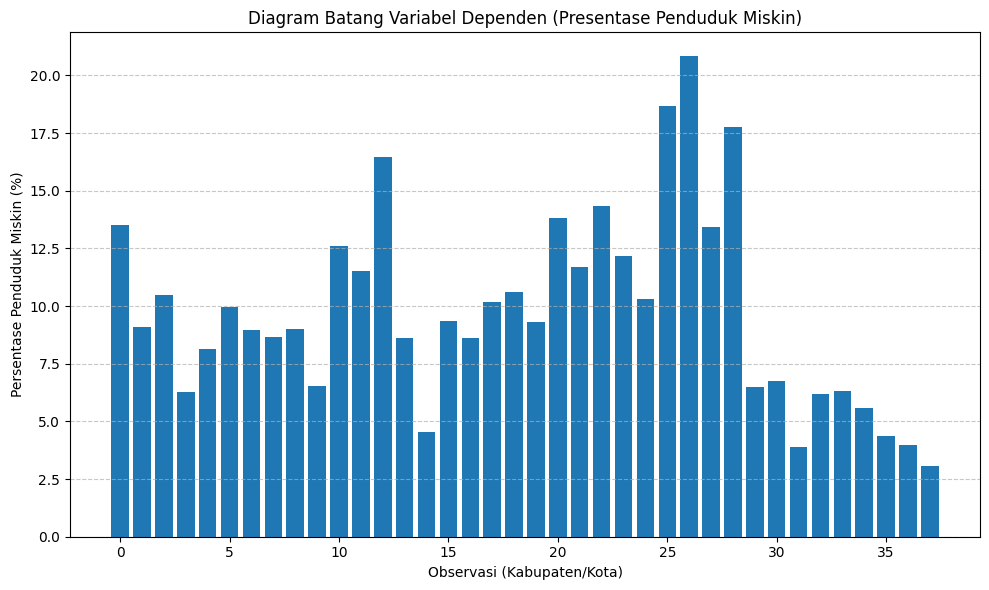

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat ulang data
path = "DATA STATREG LOGISTIK.csv"
data = pd.read_csv(path)

# Visualisasi variabel dependen (Y)
plt.figure(figsize=(10,6))
plt.bar(
    range(len(data)),
    data['Y: Presentase Penduduk Miskin']
)

plt.title("Diagram Batang Variabel Dependen (Presentase Penduduk Miskin)")
plt.xlabel("Observasi (Kabupaten/Kota)")
plt.ylabel("Persentase Penduduk Miskin (%)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


secara visual, grafik menunjukan pola linier memiliki tingkat kemiskinan ekstrem, yaitu wilayah yang terdapat pada tingkat kemiskinan di atas 20% dapat dianggap sebagai observasi dengan kondisi kemiskinan yang jauh di atas rata-rata nasional. Sedangkan, bagian grafik kanan menandakan kemiskinan yang rendah keberhasilan pembangunan ekonomi.

1. wilayah dengan tingkat kemiskinan tertinggi (indeks 24–27).
2. wilayah dengan tingkat kemiskinan rendah (indeks 30–37).
3. wilayah dengan tingkat kemsikinan rata-rata (indeks 5–20).

# Menghitung Jumlah Kolom dan Baris

In [ ]:
df.shape

(39, 6)

# Memeriksa Missing Value

In [ ]:
df.isna().sum()

,0
Y: Presentase Penduduk Miskin,1
X1: Angka Melek Huruf,0
X2: Tingkat Pengangguran Terbuka,1
X3: Laju Pertumbuhan Ekonomi,1
X4: Rata-rata lama Sekolah,1
X5: Angka Partisipasi Sekolah,1


bertujuan untuk memeriksa data kosong (missing values/NA). Jika angka 1 pada salah satu kolom, itu berarti ada satu nilai yang hilang (missing value), nilai 0 menunjukan tidak ada nilai yang hilang.

# Menghapus Missing Value

In [ ]:
df = df.dropna(subset=[
    'Y: Presentase Penduduk Miskin',
    'X2: Tingkat Pengangguran Terbuka',
    'X3: Laju Pertumbuhan Ekonomi',
    'X4: Rata-rata lama Sekolah',
    'X5: Angka Partisipasi Sekolah'
])


In [ ]:
df.isna().sum()

,0
Y: Presentase Penduduk Miskin,0
X1: Angka Melek Huruf,0
X2: Tingkat Pengangguran Terbuka,0
X3: Laju Pertumbuhan Ekonomi,0
X4: Rata-rata lama Sekolah,0
X5: Angka Partisipasi Sekolah,0


In [ ]:
df.shape

(38, 6)

Mengecek berapa baris yang hilang setelah dihapus dengan pembersihan data dilakukan dengan menggunakan perintah dropna(). Maka, pada saat data menunjukan nilai 0 berarti data telah optimal.

# Membuat Variabel Y Biner ( >10% = 1, <=10% = 0 )

In [ ]:
df["Y_bin"] = np.where(df["Y: Presentase Penduduk Miskin"] > 10, 1, 0)

# hapus kolom Y lama
df = df.drop(columns=["Y: Presentase Penduduk Miskin"])




In [ ]:
df = df[['Y_bin',
         'X1: Angka Melek Huruf',
         'X2: Tingkat Pengangguran Terbuka',
         'X3: Laju Pertumbuhan Ekonomi',
         'X4: Rata-rata lama Sekolah',
         'X5: Angka Partisipasi Sekolah']]


In [ ]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(",", ".").str.strip()
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [ ]:
df.head(39)

,Y_bin,X1: Angka Melek Huruf,X2: Tingkat Pengangguran Terbuka,X3: Laju Pertumbuhan Ekonomi,X4: Rata-rata lama Sekolah,X5: Angka Partisipasi Sekolah
0,1,94,1.56,4.34,8.0,10.75
1,0,90,4.19,4.74,8.0,20.80
2,1,95,3.90,4.71,8.0,13.52
3,0,96,4.12,4.86,9.0,22.07
4,0,94,4.77,4.44,8.0,14.92
5,0,94,5.10,4.95,8.0,18.16
6,0,95,5.13,4.96,8.0,28.29
7,0,93,3.28,4.52,7.0,16.35
8,0,90,3.23,4.86,7.0,26.11
9,0,94,4.03,4.68,8.0,16.52


Pada hasil Output ini, kita dapat melihat bahwa variabel dependen Persentase Penduduk Miskin berhasil di konversi menjadi variabel biner (Y_bin). Nilai 1 pada (Y_bin) menunjukan bahwa suatu daerah memiliki persentase penduduk miskin lebih dari 10%, sedangkan, 0 menunjukan persentase penduduk miskin di bawah 10%.

# Deskripsi Data

In [ ]:
df.describe()

,Y_bin,X1: Angka Melek Huruf,X2: Tingkat Pengangguran Terbuka,X3: Laju Pertumbuhan Ekonomi,X4: Rata-rata lama Sekolah,X5: Angka Partisipasi Sekolah
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.421053,94.000000,4.041316,4.630789,8.500000,22.159737
std,0.500355,3.093148,1.176755,0.977342,1.704525,9.052400
min,0.000000,85.000000,1.560000,1.670000,5.000000,10.750000
25%,0.000000,92.250000,3.367500,4.650000,7.250000,15.317500
50%,0.000000,94.000000,4.075000,4.840000,8.000000,20.285000
75%,1.000000,96.000000,4.735000,5.150000,10.000000,27.287500
max,1.000000,99.000000,6.490000,5.760000,12.000000,50.330000


Nilai *mean* sebesar 0.421 mengindikasikan bahwa sekitar 42,1% masuk dalam kategori (lebih dari 10%), sedangkan 57,9% sisa menyatakan rendah.

Nilai std (standar deviasi) sebesar 0.50 dan Nilai min adalah 0 dan max adalah 1. Ini memperkuat bahwa kemiskinan ≤10%.

- X1: Angka Melek Huruf (Nilai min 85% dan max 99%).
- X2: Tingkat Pengangguran Terbuka (min 1.56% dan max 6.49%).
- X3: Laju Pertumbuhan Ekonomi (min 1.67%, dan max 6.49%).
- X4: Rata-rata Lama Sekolah (mean 8.5 tahun).
- X5: Angka Partisipasi Sekolah (10.75%-50.33%).

# Cek Outlier

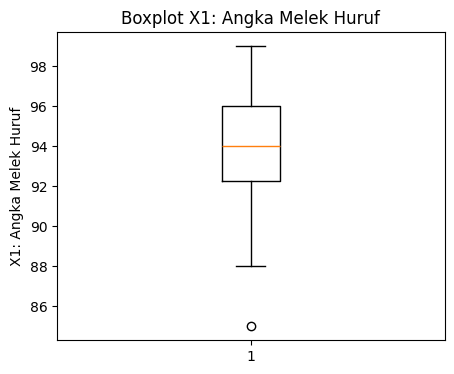

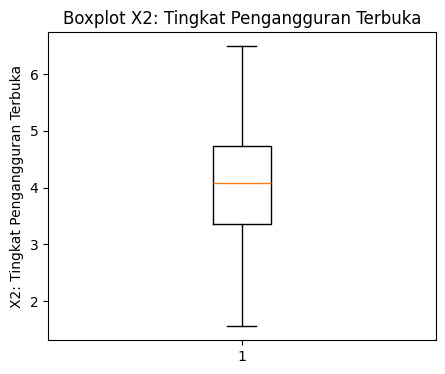

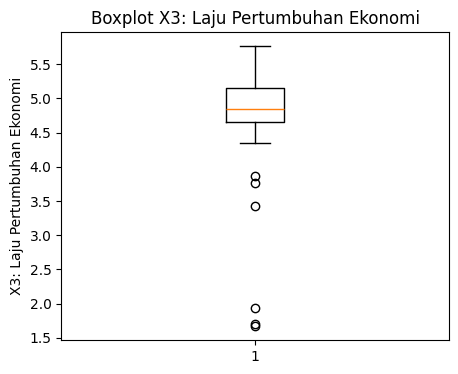

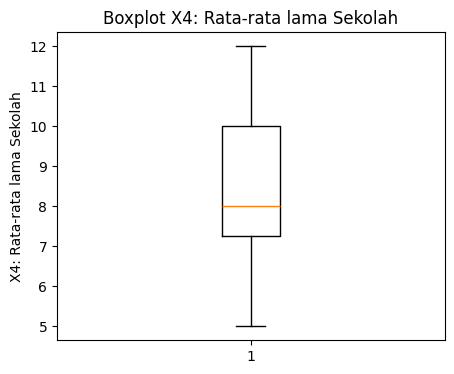

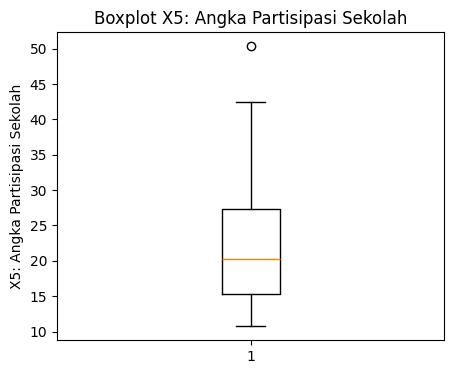

{'X1: Angka Melek Huruf': [26],
 'X2: Tingkat Pengangguran Terbuka': [],
 'X3: Laju Pertumbuhan Ekonomi': [21, 22, 25, 26, 28, 29],
 'X4: Rata-rata lama Sekolah': [],
 'X5: Angka Partisipasi Sekolah': [31]}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Kolom X
cols = [
    'X1: Angka Melek Huruf',
    'X2: Tingkat Pengangguran Terbuka',
    'X3: Laju Pertumbuhan Ekonomi',
    'X4: Rata-rata lama Sekolah',
    'X5: Angka Partisipasi Sekolah'
]

outlier_iqr = {}

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_iqr[col] = outliers.index.tolist()

    # --- Boxplot untuk variabel ini ---
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.show()

outlier_iqr


code ini menggunakan metode Interquartile Range (IQR) dengan menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3).

Output yang dihasilkan sebagai berikut.

- X1: Angka Melek Huruf (Outlier pada indeks 26).
- X3: Laju Pertumbuhan Ekonomi (outlier pada indeks 21, 22, 25, 26, 28,29).
- X5: Angka Partisipasi Sekolah (outlier pada indeks 31).

# Tangani Outlier

In [ ]:

df_imputed = df.copy()

# Daftar outlier
outliers_dict = {
    'X1: Angka Melek Huruf': [26],
    'X2: Tingkat Pengangguran Terbuka': [],
    'X3: Laju Pertumbuhan Ekonomi': [21, 22, 25, 26, 28, 29],
    'X4: Rata-rata lama Sekolah': [],
    'X5: Angka Partisipasi Sekolah': [31]
}

# Imputasi median
for col, idx_list in outliers_dict.items():
    if len(idx_list) > 0:
        median_value = df[col].median()
        df_imputed.loc[idx_list, col] = median_value

df_imputed.head(38)


,Y_bin,X1: Angka Melek Huruf,X2: Tingkat Pengangguran Terbuka,X3: Laju Pertumbuhan Ekonomi,X4: Rata-rata lama Sekolah,X5: Angka Partisipasi Sekolah
0,1,94,1.56,4.34,8.0,10.750
1,0,90,4.19,4.74,8.0,20.800
2,1,95,3.90,4.71,8.0,13.520
3,0,96,4.12,4.86,9.0,22.070
4,0,94,4.77,4.44,8.0,14.920
5,0,94,5.10,4.95,8.0,18.160
6,0,95,5.13,4.96,8.0,28.290
7,0,93,3.28,4.52,7.0,16.350
8,0,90,3.23,4.86,7.0,26.110
9,0,94,4.03,4.68,8.0,16.520


# Menentukan Variabel X dan Y

In [ ]:
X = df[['X1: Angka Melek Huruf',
        'X2: Tingkat Pengangguran Terbuka',
        'X3: Laju Pertumbuhan Ekonomi',
        'X4: Rata-rata lama Sekolah',
        'X5: Angka Partisipasi Sekolah']]

y = df['Y_bin']


# Menambahkan Konstanta

In [ ]:
X_const = sm.add_constant(X)


# Cek Multikolinearitas (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]
print(vif_data)


                           Variable          VIF
0                             const  2939.838604
1             X1: Angka Melek Huruf     4.276939
2  X2: Tingkat Pengangguran Terbuka     1.572734
3      X3: Laju Pertumbuhan Ekonomi     1.424395
4        X4: Rata-rata lama Sekolah     5.325106
5     X5: Angka Partisipasi Sekolah     2.333634


VIF adalah ukuran untuk mengetahui apakah terjadi multikolinearitas, yaitu kondisi ketika variabel-variabel bebas saling berkorelasi tinggi sehingga dapat mengganggu kestabilan model regresi. Output yang dihasilkan bahwa variabel const nilai VIF (2939.838604).

X4 (Rata-rata Lama Sekolah) memiliki VIF tertinggi yaitu 5,32 dan Nilai VIF mendekati 1 pada variabel seperti X3 (Laju Pertumbuhan Ekonomi) yaitu 1,42 dan X2 (Tingkat Pengangguran Terbuka) yaitu 1,57 yang menunjukan Nilai VIF <10 tidak terjadi multikolinearitas.

# Mengestimasi Model Regresi Logistik



In [ ]:
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.402240
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Y_bin   No. Observations:                   38
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Nov 2025   Pseudo R-squ.:                  0.4090
Time:                        10:37:08   Log-Likelihood:                -15.285
converged:                       True   LL-Null:                       -25.864
Covariance Type:            nonrobust   LLR p-value:                 0.0007563
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               24.1849     24.700      0.97

Output yang dihasilkan menunjukan bahwa model berhasil konvergen dalam 8 iterasi. kemudian nilai R-squared sebesar 0.4090 (40,9%) dan uji Likelihood (LLR) Ratio memiliki p-value 0.0007563.

Dapat dilihat seluruh variabel independen memiliki p-value di atas 0.05, menandakan bahwa secara individual tidak ada variabel yang signifikan memengaruhi probabilitas Y

# Mengecek Variabel Signifikan (berdasarkan p-value < 0.05)

In [ ]:
result.pvalues


,0
const,0.327510
X1: Angka Melek Huruf,0.698704
X2: Tingkat Pengangguran Terbuka,0.774216
X3: Laju Pertumbuhan Ekonomi,0.145183
X4: Rata-rata lama Sekolah,0.488200
X5: Angka Partisipasi Sekolah,0.330634


# Uji Signifikansi Simultan (Uji Likelihood Ratio)

In [ ]:
print(result.llr)
print(result.llr_pvalue)


21.157631843496382
0.0007563469742668831


Dilihat nilai adalah 0.0007563, yang jauh lebih kecil daripada ambang signifikansi umum 0.05.

# Uji Signifikansi Parsial (lihat p-value setiap variabel)

In [ ]:
print(result.pvalues)


const                               0.327510
X1: Angka Melek Huruf               0.698704
X2: Tingkat Pengangguran Terbuka    0.774216
X3: Laju Pertumbuhan Ekonomi        0.145183
X4: Rata-rata lama Sekolah          0.488200
X5: Angka Partisipasi Sekolah       0.330634
dtype: float64


p-value yang dihasilkan berada di atas 0.05, artinya tidak ada variabel independen yang berpengaruh signifikan secara individual (perubahan probabilitas Y_bin).

# Uji Kecocokan Model (Pseudo R²)

In [ ]:
print("McFadden R2:", result.prsquared)


McFadden R2: 0.4090182656158471


Nilai 0.4090 berarti bahwa sekitar 40,9% variasi dalam variabel Y_bin kategori kemiskinan (tinggi atau rendah).

# Mendapatkan Odds Ratio

In [ ]:
odds_ratio = pd.DataFrame({
    "OR": np.exp(result.params),
    "p-value": result.pvalues
})
print(odds_ratio)


                                            OR   p-value
const                             3.186840e+10  0.327510
X1: Angka Melek Huruf             8.912622e-01  0.698704
X2: Tingkat Pengangguran Terbuka  8.606579e-01  0.774216
X3: Laju Pertumbuhan Ekonomi      2.075277e-01  0.145183
X4: Rata-rata lama Sekolah        6.257403e-01  0.488200
X5: Angka Partisipasi Sekolah     9.085484e-01  0.330634


Code bertujuan untuk menghitung seberapa besar peluang (odds) perubahan status IPM. Terlihat bahwa nilai p-value yang berada di atas 0,05, sehingga tidak ada variabel yang mampu menjelaskan perubahan peluang suatu wilayah masuk ke kategori IPM tinggi.

# Membuat Prediksi Probabilitas

In [ ]:
df["Pred_Prob"] = result.predict(X_const)
df.head(38)


,Y_bin,X1: Angka Melek Huruf,X2: Tingkat Pengangguran Terbuka,X3: Laju Pertumbuhan Ekonomi,X4: Rata-rata lama Sekolah,X5: Angka Partisipasi Sekolah,Pred_Prob
0,1,94,1.56,4.34,8.0,10.75,0.821077
1,0,90,4.19,4.74,8.0,20.80,0.499153
2,1,95,3.90,4.71,8.0,13.52,0.552290
3,0,96,4.12,4.86,9.0,22.07,0.188024
4,0,94,4.77,4.44,8.0,14.92,0.618879
5,0,94,5.10,4.95,8.0,18.16,0.336834
6,0,95,5.13,4.96,8.0,28.29,0.143771
7,0,93,3.28,4.52,7.0,16.35,0.736794
8,0,90,3.23,4.86,7.0,26.11,0.477895
9,0,94,4.03,4.68,8.0,16.52,0.516241


# Membuat Prediksi

In [ ]:
y_pred_prob = result.predict(X_const)
y_pred = (y_pred_prob > 0.5).astype(int)


# Confusion Matrix + Akurasi

Confusion Matrix:
 [[19  3]
 [ 4 12]]

Akurasi: 0.8157894736842105

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.80      0.75      0.77        16

    accuracy                           0.82        38
   macro avg       0.81      0.81      0.81        38
weighted avg       0.82      0.82      0.81        38



<Figure size 600x500 with 0 Axes>

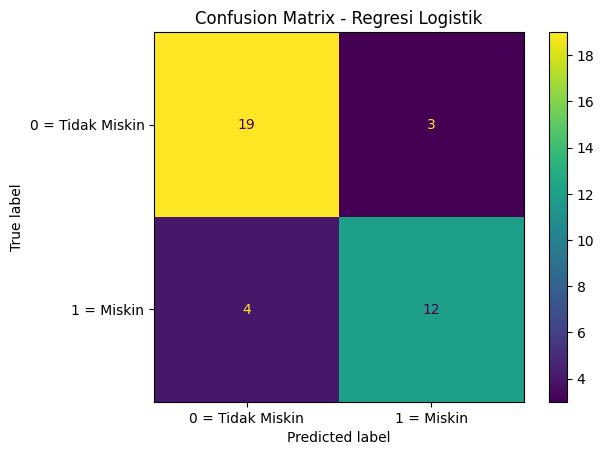

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)

print("Confusion Matrix:\n", cm)
print("\nAkurasi:", acc)
print("\nClassification Report:\n", classification_report(y, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0 = Tidak Miskin', '1 = Miskin'])
disp.plot(values_format='d')
plt.title("Confusion Matrix - Regresi Logistik")
plt.show()


Model regresi logistik menunjukkan performa dengan mengklasifikasikan data menjadi dua kategori yaitu 0  (Tidak Miskin) dan 1 (Miskin).

Untuk kelas Tidak Miskin dengan precision sebesar 0.83 (Tidak Miskin), sementara recall sebesar 0.86 (Tidak Miskin). Pada kelas Miskin, precision sebesar 0.80(Miskin), dan recall 0.75 (miskin). Lalu, Nilai F1-score untuk kedua kelas berada pada kisaran 0.77–0.84.

# ROC Curve + AUC

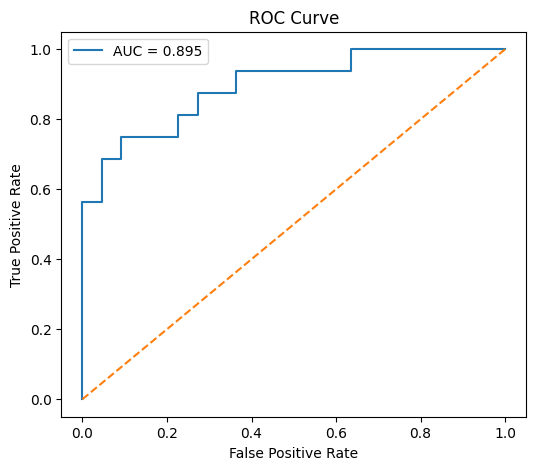

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Kurva ROC terbentuk dari hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR). pada grafik yakni 0.895, yang berarti model memiliki kemampuan klasifikasi yang tinggi. maka, dapat dilihat bahwa nilai 0.895 menunjukkan jika dipilih secara acak satu individu miskin dan satu individu tidak miskin (semakin mendekati 1).